<a href="https://colab.research.google.com/github/ssat24/AAIC-Notes/blob/master/day1_Stock_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip3 install quandl

In [15]:
import quandl
quandl.ApiConfig.api_key = 'tEsTkEy123456789'


In [16]:
quandl.ApiConfig.verify_ssl = False


In [22]:
import quandl
quandl.save_key("supersecret")
print(quandl.ApiConfig.api_key)


supersecret


## Stock Market Data Analysis 

**1. Getting Stock Data** 

Getting data from Quandl

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import seaborn as sns
sns.set_context("notebook")

In [62]:
tata_steel = quandl.get("NSE/TATASTEEL", authtoken="HFyeATwVxj5e3yEcZfZp")


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [63]:
tata_steel.shape

(3278, 7)

In [64]:
tata_steel.head(4)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2005-10-17,380.00,386.30,374.6,384.20,384.35,4618966.0,17639.41
2005-10-18,386.85,388.55,364.1,365.10,374.85,3408087.0,13024.16
2005-10-19,371.60,373.55,352.0,362.70,361.55,4549667.0,16641.13
2005-10-20,365.30,371.85,351.5,359.55,358.60,4132203.0,14995.74


In [65]:
tata_steel.tail(4)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2019-01-01,524.0,524.50,513.55,515.6,515.75,4128173.0,21325.91
2019-01-02,506.0,506.80,492.00,492.5,493.65,11747350.0,58693.48
2019-01-03,493.0,493.15,480.25,480.9,481.25,13532944.0,65765.17
2019-01-04,481.0,492.85,479.55,492.7,487.65,10480072.0,50786.93


In [66]:
tata_steel.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3278.0,4.788441e+02,1.552790e+02,137.50,3.714125e+02,468.900,5.828875e+02,997.30
High,3278.0,4.869469e+02,1.580195e+02,150.40,3.769750e+02,475.100,5.909500e+02,1048.00
Low,3278.0,4.695951e+02,1.519569e+02,137.50,3.651625e+02,460.200,5.729875e+02,966.25
Last,3278.0,4.777964e+02,1.548563e+02,148.90,3.700625e+02,468.000,5.803625e+02,993.00
Close,3278.0,4.779205e+02,1.548675e+02,148.80,3.702625e+02,468.175,5.812375e+02,988.90
Total Trade Quantity,3278.0,5.553179e+06,3.438241e+06,66051.00,3.244017e+06,4796351.500,6.970968e+06,49407351.00
Turnover (Lacs),3278.0,2.520267e+04,1.650164e+04,207.05,1.412245e+04,20519.180,3.133178e+04,240287.82


**2. Visualizong Stock Data**

Plot the Daily Closing Price and Volume of a Stock

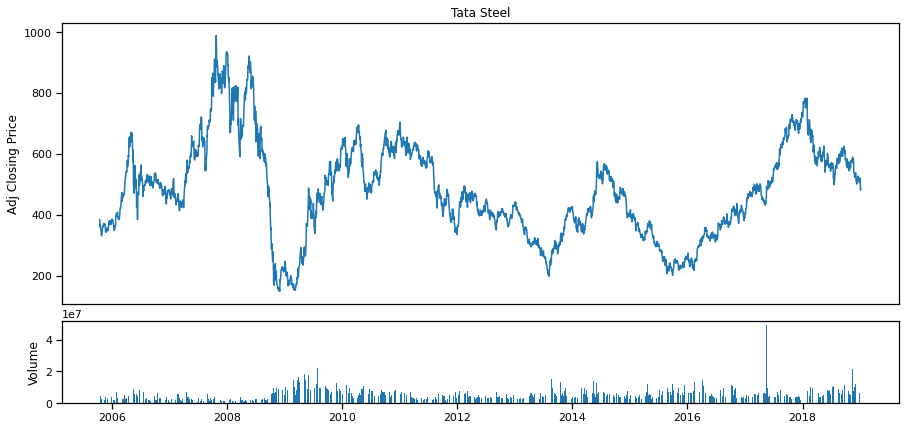

In [67]:
plt.figure(figsize=(15,7))
top = plt.subplot2grid((4,4), (0,0), rowspan =3, colspan = 4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan =1, colspan=4)
top.plot(tata_steel.index , tata_steel['Close'])
bottom.bar(tata_steel.index, tata_steel['Total Trade Quantity'])

#set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('Tata Steel')
top.set_ylabel('Adj Closing Price')
bottom.set_ylabel('Volume');

<Figure size 1080x504 with 0 Axes>

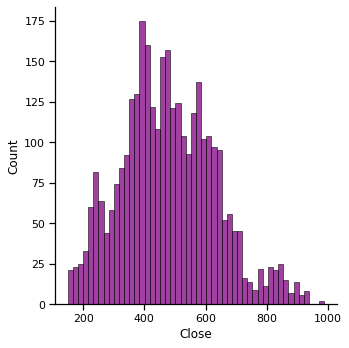

In [69]:
plt.figure(figsize=(15,7))
sns.displot(tata_steel['Close'].dropna(), bins=50, color='purple',legend='True');

Chart using Simple Moving Average

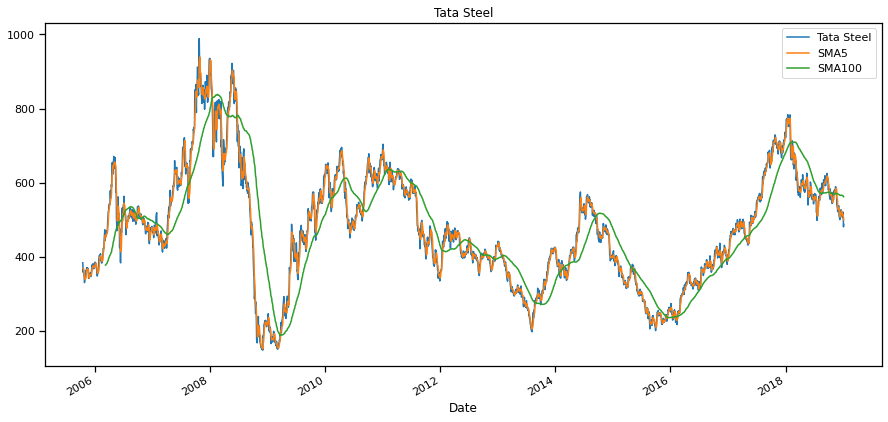

In [73]:
sma5 = tata_steel['Close'].rolling(5).mean()
sma100 = tata_steel['Close'].rolling(100).mean()

tata_steel_sma = pd.DataFrame({'Tata Steel': tata_steel['Close'], 'SMA5':sma5 ,'SMA100': sma100})
tata_steel_sma.plot(figsize=(15,7), legend=True, title='Tata Steel');